In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from IPython.display import clear_output
from src import spotify, dp, utils, DB

db = DB()

In [3]:
# 1. Get Token
token = spotify.get_token()

# 2. Select Music
sel_tracks = spotify.search_tracks(token)
mail_box_id = str(db.regist_mail_box(sel_tracks).inserted_id)

# 3. Data Processing
genres = spotify.get_genres(token, sel_tracks)
features = spotify.get_features(token, sel_tracks)
db.observe_seed_zone(features)

recos = spotify.get_recommend(sel_tracks, features, genres, token)
reco_features = spotify.get_features(token, recos)

계속하시려면 next, 종료는 exit를 입력해주세요.exit


### sel tracks (우체통)
- 사용자의 음악 성향

In [4]:
sel_tracks.head()

,id,name,artists,artists_name
0,2FWquqPNxte8iqZ3ATQG0p,All I Wanna Do (K) (Feat. Hoody & Loco),4XDi67ZENZcbfKnvMnTYsI,Jay Park
1,2SMq0lOqCTHayWa9juoI0d,We Are,5a8EJtOEbUJDF4RX3mKK02,Woo
2,5xrtzzzikpG3BLbo4q1Yul,LILAC,3HqSLMAZ3g3d5poNaI7GOU,IU
3,4LxFRsy3TZjqAtAgIsjkez,"Rainy day (Feat. ASH ISLAND, Skinny Brown)",0J372uvAXbRjLFSoAVE2lp,PATEKO


In [5]:
features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FWquqPNxte8iqZ3ATQG0p,0.403,0.724,8,-6.064,0.2460,0.3770,0.000000,0.0927,0.428,97.133
1,2SMq0lOqCTHayWa9juoI0d,0.756,0.808,7,-3.272,0.0752,0.1470,0.000000,0.1290,0.685,100.018
2,5xrtzzzikpG3BLbo4q1Yul,0.738,0.890,2,-2.275,0.0748,0.0895,0.000002,0.2130,0.750,114.942
3,4LxFRsy3TZjqAtAgIsjkez,0.621,0.783,2,-4.780,0.1620,0.5500,0.000000,0.1090,0.490,160.161


### recos
- 사용자가 등록한 음악으로 Spotify API 에서 추천된 음악

In [6]:
recos.head()

,id,name,artists,artists_name
0,2PcJoVkfjcbvoqBxV1Nj7y,All I Wanna Do,4XDi67ZENZcbfKnvMnTYsI,Jay Park
1,2xYnqYBNL62ypPiA0wjD0s,AUTOMATIC,0LyfQWJT6nXafLPZqxe9Of,Various Artists
2,2IgbYlOlFpiSFYnsqB39lM,Jasmine,0siBQaURCli5wn2lqv8WZg,DPR LIVE
3,6z1kLsntE7FuzKZHZWrXYN,instagram,3eCd0TZrBPm2n9cDG6yWfF,DEAN
4,4TlN6gykUprYUyjaI8CeQD,Here To Stay - SKULL featuring Mighty Mystic,7qKWQnE3S7v8m3rLwMVdGg,SKULL


In [7]:
reco_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2PcJoVkfjcbvoqBxV1Nj7y,0.613,0.668,8,-6.867,0.2670,0.245,0.0,0.0735,0.509,96.176
1,2xYnqYBNL62ypPiA0wjD0s,0.720,0.703,8,-5.281,0.0409,0.133,0.0,0.1210,0.492,99.999
2,2IgbYlOlFpiSFYnsqB39lM,0.597,0.486,8,-5.893,0.0986,0.331,0.0,0.1400,0.397,137.680
3,6z1kLsntE7FuzKZHZWrXYN,0.463,0.566,8,-6.195,0.1450,0.196,0.0,0.2840,0.219,93.921
4,4TlN6gykUprYUyjaI8CeQD,0.619,0.737,8,-5.052,0.0338,0.291,0.0,0.1310,0.948,93.921


### norm data
- 정규화

In [8]:
norm_features = dp.make_norm(features, reco_features)

norm_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FWquqPNxte8iqZ3ATQG0p,0.129542,0.645070,0.727273,0.380994,0.498538,0.401671,0.000000,0.069832,0.358491,0.211845
1,2SMq0lOqCTHayWa9juoI0d,0.687204,0.763380,0.636364,0.685266,0.114459,0.155929,0.000000,0.118117,0.661557,0.234051
2,5xrtzzzikpG3BLbo4q1Yul,0.658768,0.878873,0.181818,0.793919,0.113560,0.094493,0.000326,0.229848,0.738208,0.348925
3,4LxFRsy3TZjqAtAgIsjkez,0.473934,0.728169,0.181818,0.520924,0.309647,0.586512,0.000000,0.091514,0.431604,0.696989
4,2PcJoVkfjcbvoqBxV1Nj7y,0.461295,0.566197,0.727273,0.293483,0.545761,0.260636,0.000000,0.044294,0.454009,0.204478


### 추천된 데이터들의 audio features 시각화

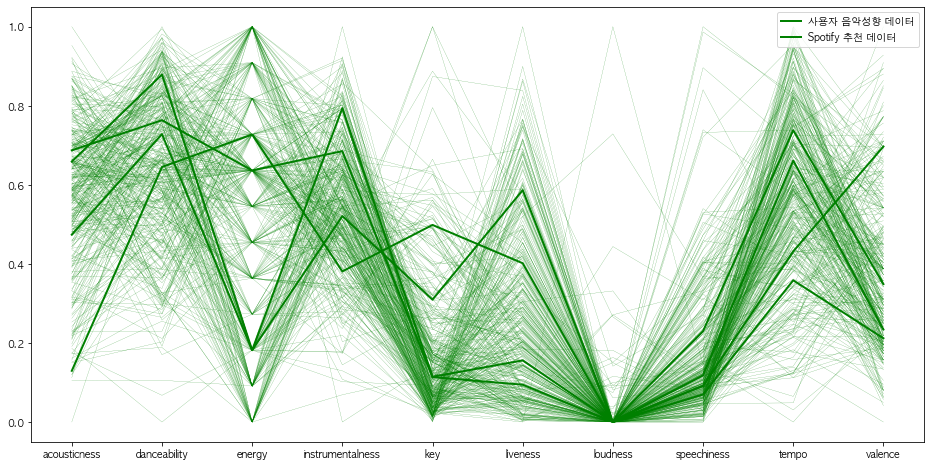

In [9]:
utils.visual_norm_data(sel_tracks, norm_features)

### KMeans

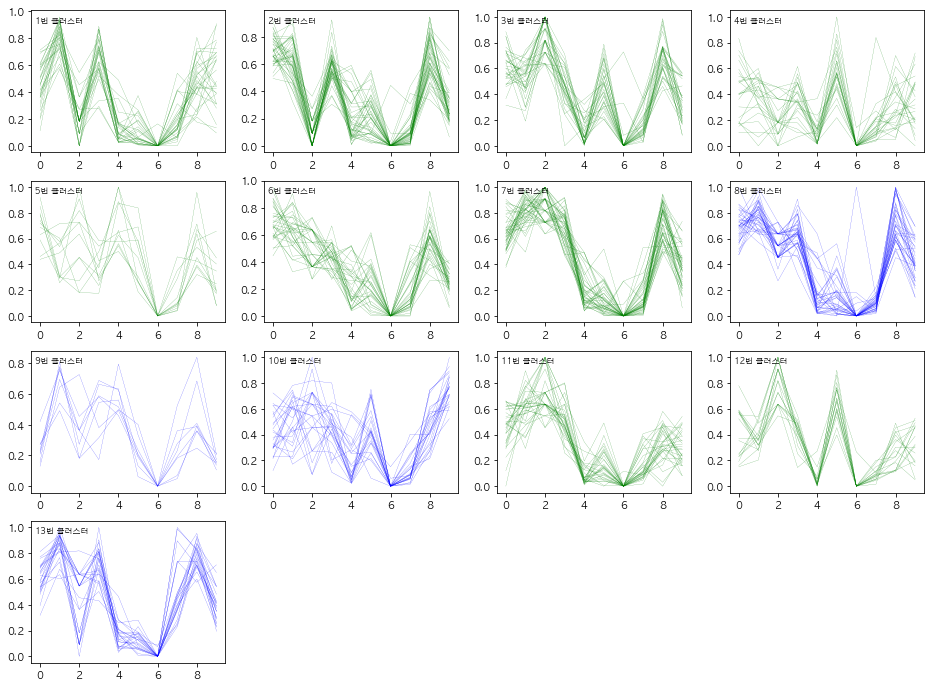

In [10]:
kmeans = utils.KMeans(
    datas=norm_features
)
kmeans.run(early_stop_cnt=5)
clear_output(wait=True)

utils.visual_cluster_data(sel_tracks, kmeans)

In [11]:
_filtering_music_list = dp.music_filtering(sel_tracks, kmeans)

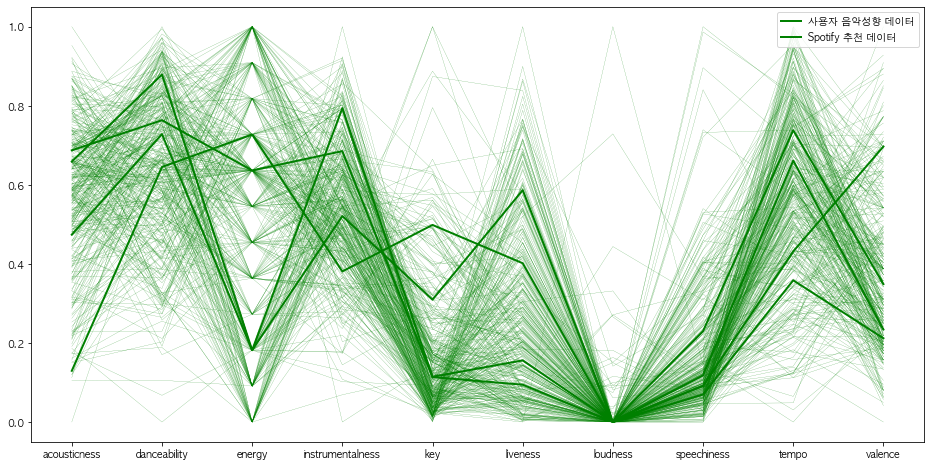

In [12]:
utils.visual_norm_data(sel_tracks, norm_features)

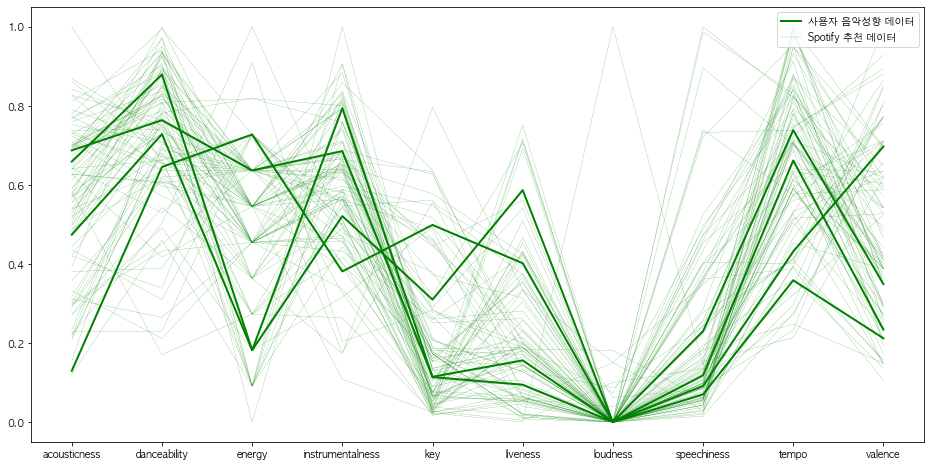

,id,name,artists,artists_name
2,2IgbYlOlFpiSFYnsqB39lM,Jasmine,0siBQaURCli5wn2lqv8WZg,DPR LIVE
8,0aLqNqF7BeSrMBHoWj0aba,나빠,6aLdhHUqgdKE86xbtNmY8g,Crush
11,5quFr5s5PXYfUX5jV2EBZ1,GANADARA (Feat. IU),4XDi67ZENZcbfKnvMnTYsI,Jay Park
13,3Jbpo2slhW2bbVneiJnC9G,LMLY,1kfWoWgCugPkyxQP8lkRlY,Jackson Wang
19,6nzCvAtyADh0wwZEVMoujK,By My Side,0lgENJQUkqkDbpsTYEayOr,JUNNY


In [13]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

In [14]:
res = db.regist_mail(mail_box_id, recos[reco_musics])
mail_id = res.inserted_id
print("우체통({})에\n추천 플레이리스트 MuLetter({})가 등록되었습니다.".format(
    mail_box_id
    ,str(mail_id)))

우체통(6239a095db6ce67c4c52511c)에
추천 플레이리스트 MuLetter(6239a0e0db6ce67c4c525121)가 등록되었습니다.


In [15]:
genres

,count
k-pop,2


In [16]:
spotify.get_genres(token,recos[reco_musics])

,count
k-pop,53
latin,1
reggaeton,1
